In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("data/Train.csv")

In [3]:
train.head(10)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,010Q650 X 2020-01-07,2020-01-07,010Q650,28.0,10.0,52.0,1053.22,94,14.600000,42.200001,...,30.605176,-62.134264,23.419991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,010Q650 X 2020-01-08,2020-01-08,010Q650,21.0,6.0,51.0,1239.66,96,15.600000,47.100002,...,60.866484,-71.908414,32.348835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,010Q650 X 2020-01-09,2020-01-09,010Q650,18.0,6.0,28.0,307.93,93,18.600000,62.400002,...,59.674296,-60.765053,26.396956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,010Q650 X 2020-01-10,2020-01-10,010Q650,21.0,15.0,33.0,305.92,95,11.800000,39.000000,...,37.176703,-73.812750,31.707143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,10.396144,33.100002,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
Y = train['target']

## Duplicates and Missing Values

In [5]:
train.duplicated().value_counts()

False    30557
Name: count, dtype: int64

In [6]:
train.shape

(30557, 82)

<Axes: >

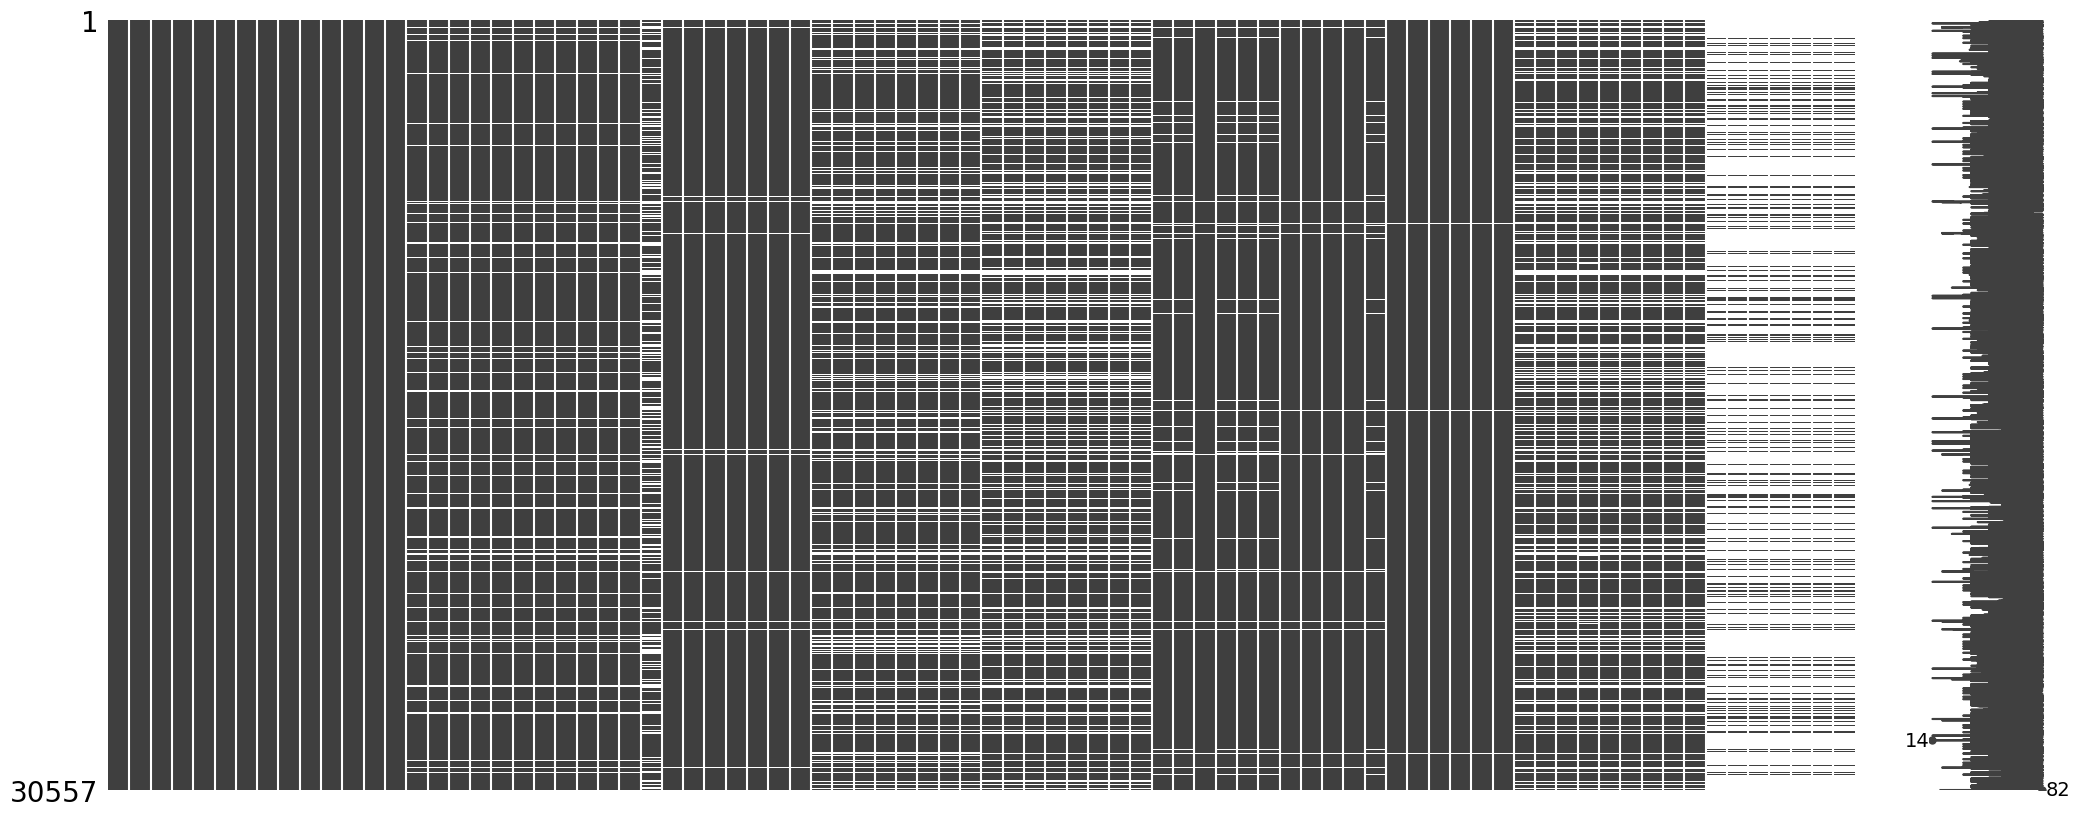

In [7]:
msno.matrix(train)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

## Data Imputation

In the following section we are investigating columns on whether they have zero or lower values, where it is not meaningful. For this purpose we derive a csv/list of column names where zeros or lower values are possible as minimum value. We get this information from the column description data provided on the original resource websites of the datasets. 

After figuring out which columns have zero values in general, we check those columns against the previously imported list. According to the result we generate two new lists: one containing the columns where zeros are ok to occur (zeros_ok_list), the other containing the columns where zeros need to be handled (imputation_list).

In [9]:
columns_with_zero = train.columns[train.eq(0).any()]
list(columns_with_zero)

['target_variance',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_azimuth_angle',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_CO_solar_zenith_angle',
 'L3_HCHO_HCHO_slant_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_HCHO_sensor_azimuth_angl

In [10]:
#Import csv containing column names where values <=0 are meaningful and therefore allowed (filtered from google sheets file)
columns_where_zero_ok = list(pd.read_csv("air_pollution_columns_where_zero_ok.csv").loc[:, 'Column Name'])

In [11]:
columns_where_zero_ok

['L3_AER_AI_absorbing_aerosol_index',
 'L3_AER_AI_sensor_azimuth_angle',
 'L3_AER_AI_solar_azimuth_angle',
 'L3_CLOUD_cloud_fraction',
 'L3_CLOUD_sensor_azimuth_angle',
 'L3_CLOUD_solar_azimuth_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_azimuth_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_HCHO_HCHO_slant_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_HCHO_sensor_azimuth_angle',
 'L3_HCHO_solar_azimuth_angle',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_SO2_SO2_column_number_density',
 'L3_SO2_SO2_slant_column_number_density',
 'L3_SO2_absorbing_aerosol_index',
 'L3_SO2_cloud_fraction',
 'L3_SO2_sensor_

In [12]:
#compare list1 of columns with zeros with list2 of columns where <=zero values are allowed. 
#If item of list1 not included in list2, create new list "imputation_list" with all columns where <=zero values are not allowed, hence need to be imputed
#else append to zeros_ok_list

#list of columns where <=zeros should be imputed
imputation_list = []

#list of columns where <=zeros are ok
zeros_ok_list = []

for column in columns_with_zero:
    if not column in columns_where_zero_ok:
        imputation_list.append(column)
    else:
        zeros_ok_list.append(column)


In [13]:
imputation_list

['target_variance',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_sensor_altitude',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_solar_zenith_angle',
 'L3_HCHO_sensor_zenith_angle',
 'L3_HCHO_solar_zenith_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
 'L3_SO2_SO2_column_number_density_amf',
 'L3_SO2_sensor_zenith_angle',
 'L3_SO2_solar_zenith_angle',
 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
 'L3_CH4_aerosol_height',
 'L3_CH4_aerosol_optical_depth',
 'L3_CH4_sensor_zenith_angle',
 'L3_CH4_solar_zenith_angle']

In [14]:
zeros_ok_list

['L3_NO2_NO2_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_CO_CO_column_number_density',
 'L3_CO_H2O_column_number_density',
 'L3_CO_cloud_height',
 'L3_CO_sensor_azimuth_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_HCHO_HCHO_slant_column_number_density',
 'L3_HCHO_cloud_fraction',
 'L3_HCHO_sensor_azimuth_angle',
 'L3_HCHO_solar_azimuth_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_CLOUD_cloud_fraction',
 'L3_SO2_SO2_column_number_density',
 'L3_SO2_SO2_slant_column_number_density',
 'L3_SO2_absorbing_aerosol_index',
 'L3_SO2_cloud_fraction',
 'L3_SO2_sensor_azimuth_angle',
 'L3_SO2_solar_azimuth_angle',
 'L3_CH4_sensor_azimuth_angle',
 'L3_CH4_solar_azimuth_angle']

In [15]:
#cross check whether zeros_ok_list is <= columns_where_zero_ok --> shouldn't be longer
len(zeros_ok_list) <= len(columns_where_zero_ok)

True

In [16]:
#cross check whether both created lists share any identical items using set intersection
intersect = set(zeros_ok_list) & set(imputation_list)

if len(intersect) > 0:
    print("The lists have identical items:", intersect)
else:
    print("The lists have no identical items.")

The lists have no identical items.


## Baseline Models

Baseline assumptions:
* less precipitation &rarr; high pollution
* more wind &rarr; high pollution

**Data Imputation strategy** for baseline model: 
1. drop columns with missing values percentage is higher than 15%
2. impute all remaining missing values with the mean of the respective location

Create a baseline dataset first, with a provisoric approach of dealing with missing/incomplete data. 
Drop columns where a lot is missing and fill rows where only few data is missing with mean values.

In [17]:
train_bl = train.copy()

In [18]:
print(f"numbers of rows : {train_bl.shape[0]}")

high_missing_cols_train = []
for index, col in enumerate(train_bl.columns):
    mpercentage = round(train_bl[col].isna().sum()/train_bl.shape[0]*100,2)
    if mpercentage > 15:
        high_missing_cols_train.append(col)
        print(f"missing values in {index} - {col} : {mpercentage} %")

print(f"missing values in data frame : {round(train_bl.isna().sum().sum()/(train_bl.shape[0]*train_bl.shape[1])*100,2)} %")
len(high_missing_cols_train)

numbers of rows : 30557
missing values in 25 - L3_NO2_tropospheric_NO2_column_number_density : 28.37 %
missing values in 33 - L3_CO_CO_column_number_density : 17.75 %
missing values in 34 - L3_CO_H2O_column_number_density : 17.75 %
missing values in 35 - L3_CO_cloud_height : 17.75 %
missing values in 36 - L3_CO_sensor_altitude : 17.75 %
missing values in 37 - L3_CO_sensor_azimuth_angle : 17.75 %
missing values in 38 - L3_CO_sensor_zenith_angle : 17.75 %
missing values in 39 - L3_CO_solar_azimuth_angle : 17.75 %
missing values in 40 - L3_CO_solar_zenith_angle : 17.75 %
missing values in 41 - L3_HCHO_HCHO_slant_column_number_density : 24.3 %
missing values in 42 - L3_HCHO_cloud_fraction : 24.3 %
missing values in 43 - L3_HCHO_sensor_azimuth_angle : 24.3 %
missing values in 44 - L3_HCHO_sensor_zenith_angle : 24.3 %
missing values in 45 - L3_HCHO_solar_azimuth_angle : 24.3 %
missing values in 46 - L3_HCHO_solar_zenith_angle : 24.3 %
missing values in 47 - L3_HCHO_tropospheric_HCHO_column_n

33

Highest missing values in column indexes (columns to drop):
* 15-20%: index 33-40
* \> 20%: 
    * index 25
    * 41 - 48
    * 66 - 81

In [19]:
#Build list of columns to drop
index_list = [25]
index_list.extend(np.arange(33, 41)) # 15- 20%
index_list.extend(np.arange(41, 49)) # > 20%
index_list.extend(np.arange(66, 82)) # > 20%

In [20]:
# Remove columns by index
train_bl = train_bl.drop(train_bl.columns[index_list], axis=1)

In [21]:
train_bl.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure', 'L3_O3_O3_column_number_density',
       'L3_O3_O3_effective_temperature', 'L3_O3_cloud_fraction',
       'L3_O3_sensor_azimuth_angle', 'L3_O3_sensor_zenith_angle',
       'L3_O3_solar_azimuth_an

<Axes: >

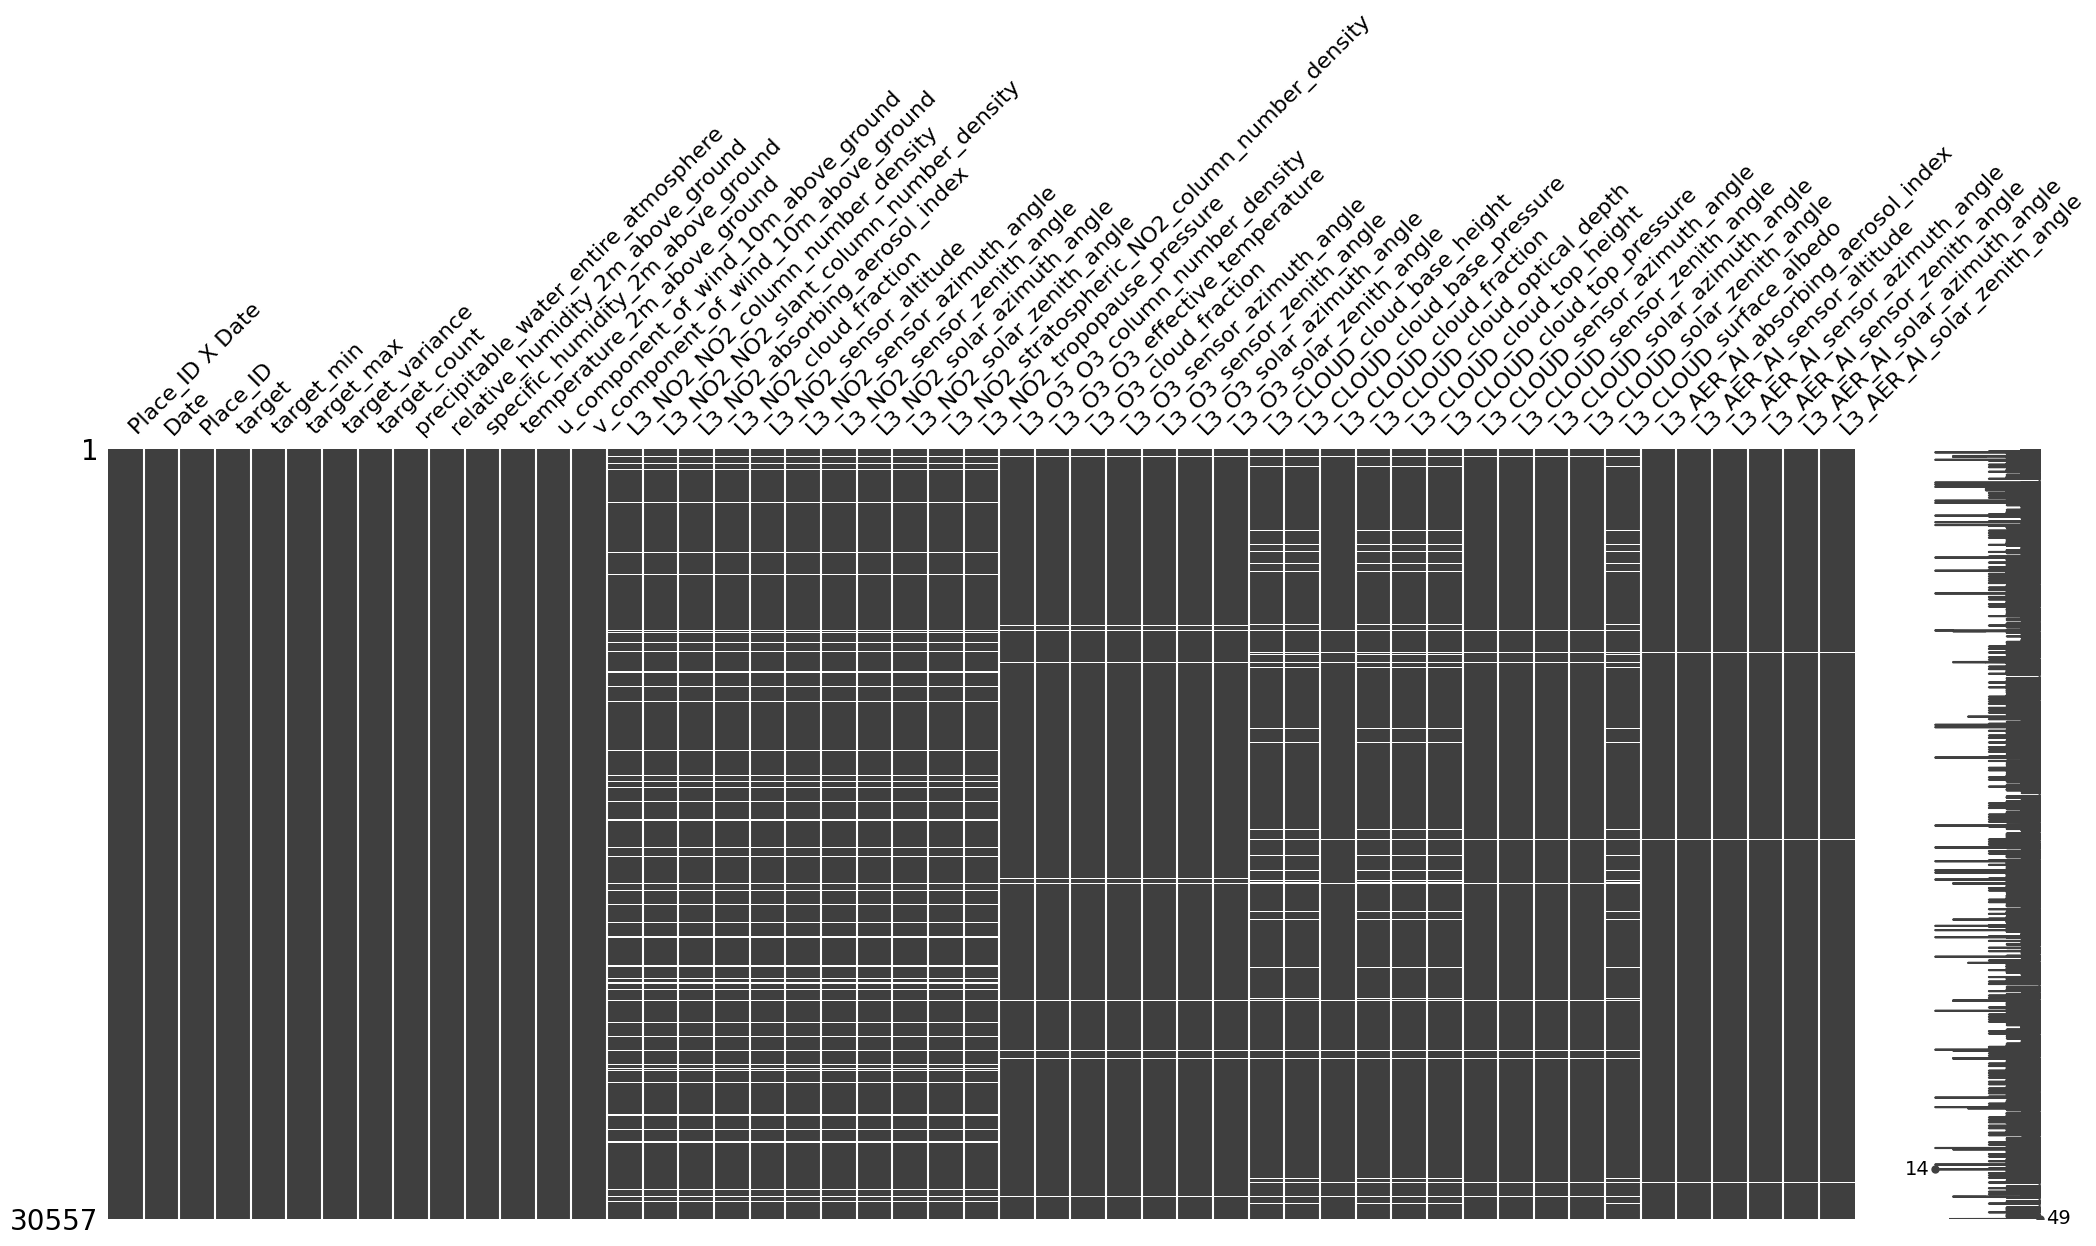

In [22]:
msno.matrix(train_bl)

In [23]:
print(f"numbers of rows : {train_bl.shape[0]}")
for index, col in enumerate(train_bl.columns):
    print(f"missing values in {index} - {col} : {round(train_bl[col].isna().sum()/train_bl.shape[0]*100,2)} %")

print(f"missing values in data frame : {round(train_bl.isna().sum().sum()/(train_bl.shape[0]*train_bl.shape[1])*100,2)} %")

numbers of rows : 30557
missing values in 0 - Place_ID X Date : 0.0 %
missing values in 1 - Date : 0.0 %
missing values in 2 - Place_ID : 0.0 %
missing values in 3 - target : 0.0 %
missing values in 4 - target_min : 0.0 %
missing values in 5 - target_max : 0.0 %
missing values in 6 - target_variance : 0.0 %
missing values in 7 - target_count : 0.0 %
missing values in 8 - precipitable_water_entire_atmosphere : 0.0 %
missing values in 9 - relative_humidity_2m_above_ground : 0.0 %
missing values in 10 - specific_humidity_2m_above_ground : 0.0 %
missing values in 11 - temperature_2m_above_ground : 0.0 %
missing values in 12 - u_component_of_wind_10m_above_ground : 0.0 %
missing values in 13 - v_component_of_wind_10m_above_ground : 0.0 %
missing values in 14 - L3_NO2_NO2_column_number_density : 7.16 %
missing values in 15 - L3_NO2_NO2_slant_column_number_density : 7.16 %
missing values in 16 - L3_NO2_absorbing_aerosol_index : 7.16 %
missing values in 17 - L3_NO2_cloud_fraction : 7.16 %
miss

In [24]:
train_bl['wind_magnitude'] = np.sqrt(train_bl['u_component_of_wind_10m_above_ground']**2 + train_bl['v_component_of_wind_10m_above_ground']**2)

In [25]:
train_sorted = train_bl.sort_values(by="Date")

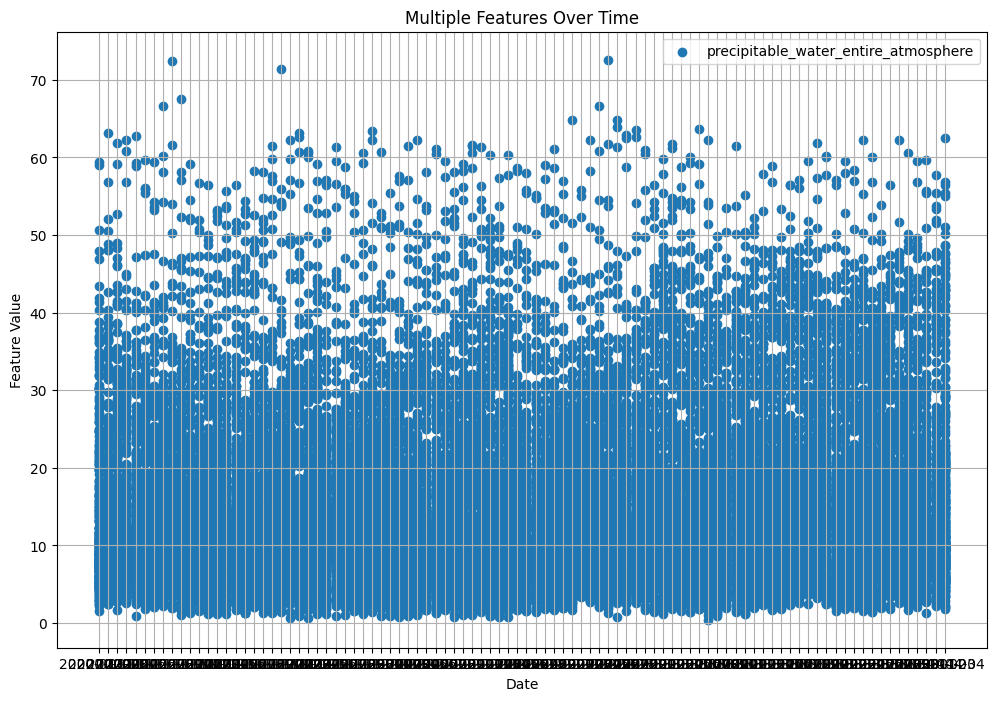

In [26]:
import matplotlib.pyplot as plt

# List of features to plot
features_to_plot = ["precipitable_water_entire_atmosphere"]  # Add more feature names as needed

# Assuming your DataFrame is named train_bl
# Replace "Date" with the actual date column name

date_column = "Date"

plt.figure(figsize=(12, 8))  # Set the size of the plot

for feature in features_to_plot:
    # Plotting each feature over time
    plt.scatter(train_sorted[date_column], train_sorted[feature], label=feature)

# Adding labels and title
plt.xlabel("Date")
plt.ylabel("Feature Value")
plt.title("Multiple Features Over Time")

# Adding a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [27]:
train_sorted['Date'] = pd.to_datetime(train_bl['Date'])

In [28]:
train_sorted['month'] = train_sorted['Date'].dt.month
train_sorted['week'] = train_sorted['Date'].dt.isocalendar().week
train_sorted['day'] = train_sorted['Date'].dt.day

In [29]:
train_sorted['day'].dtype

dtype('int32')

In [30]:
train_sorted = train_sorted.drop(['Place_ID X Date', 'Place_ID'], axis=1)

In [31]:
daily_means = train_sorted.groupby(train_sorted['day']).mean()

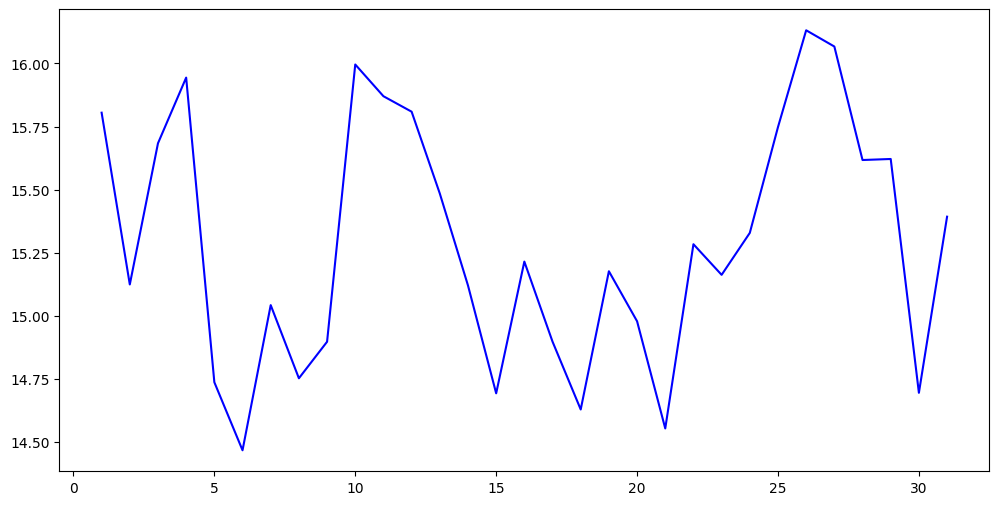

In [32]:
plt.figure(figsize=(12, 6))

plt.plot(daily_means.index, daily_means['precipitable_water_entire_atmosphere'], label='Mean of Feature', color='blue')


In [33]:
train_place = train_bl.drop(['Place_ID X Date', 'Date'], axis=1)
means = train_place.groupby('Place_ID').mean()

Impute data by filling in mean of each location for respective feature.

In [34]:
grouped = train_place.groupby('Place_ID')

for name, group in grouped:
    mask = train_place['Place_ID'] == name
    train_place.loc[mask] = train_place.loc[mask].fillna(means.loc[name])

Final imputed dataset: **train_place**

<Axes: >

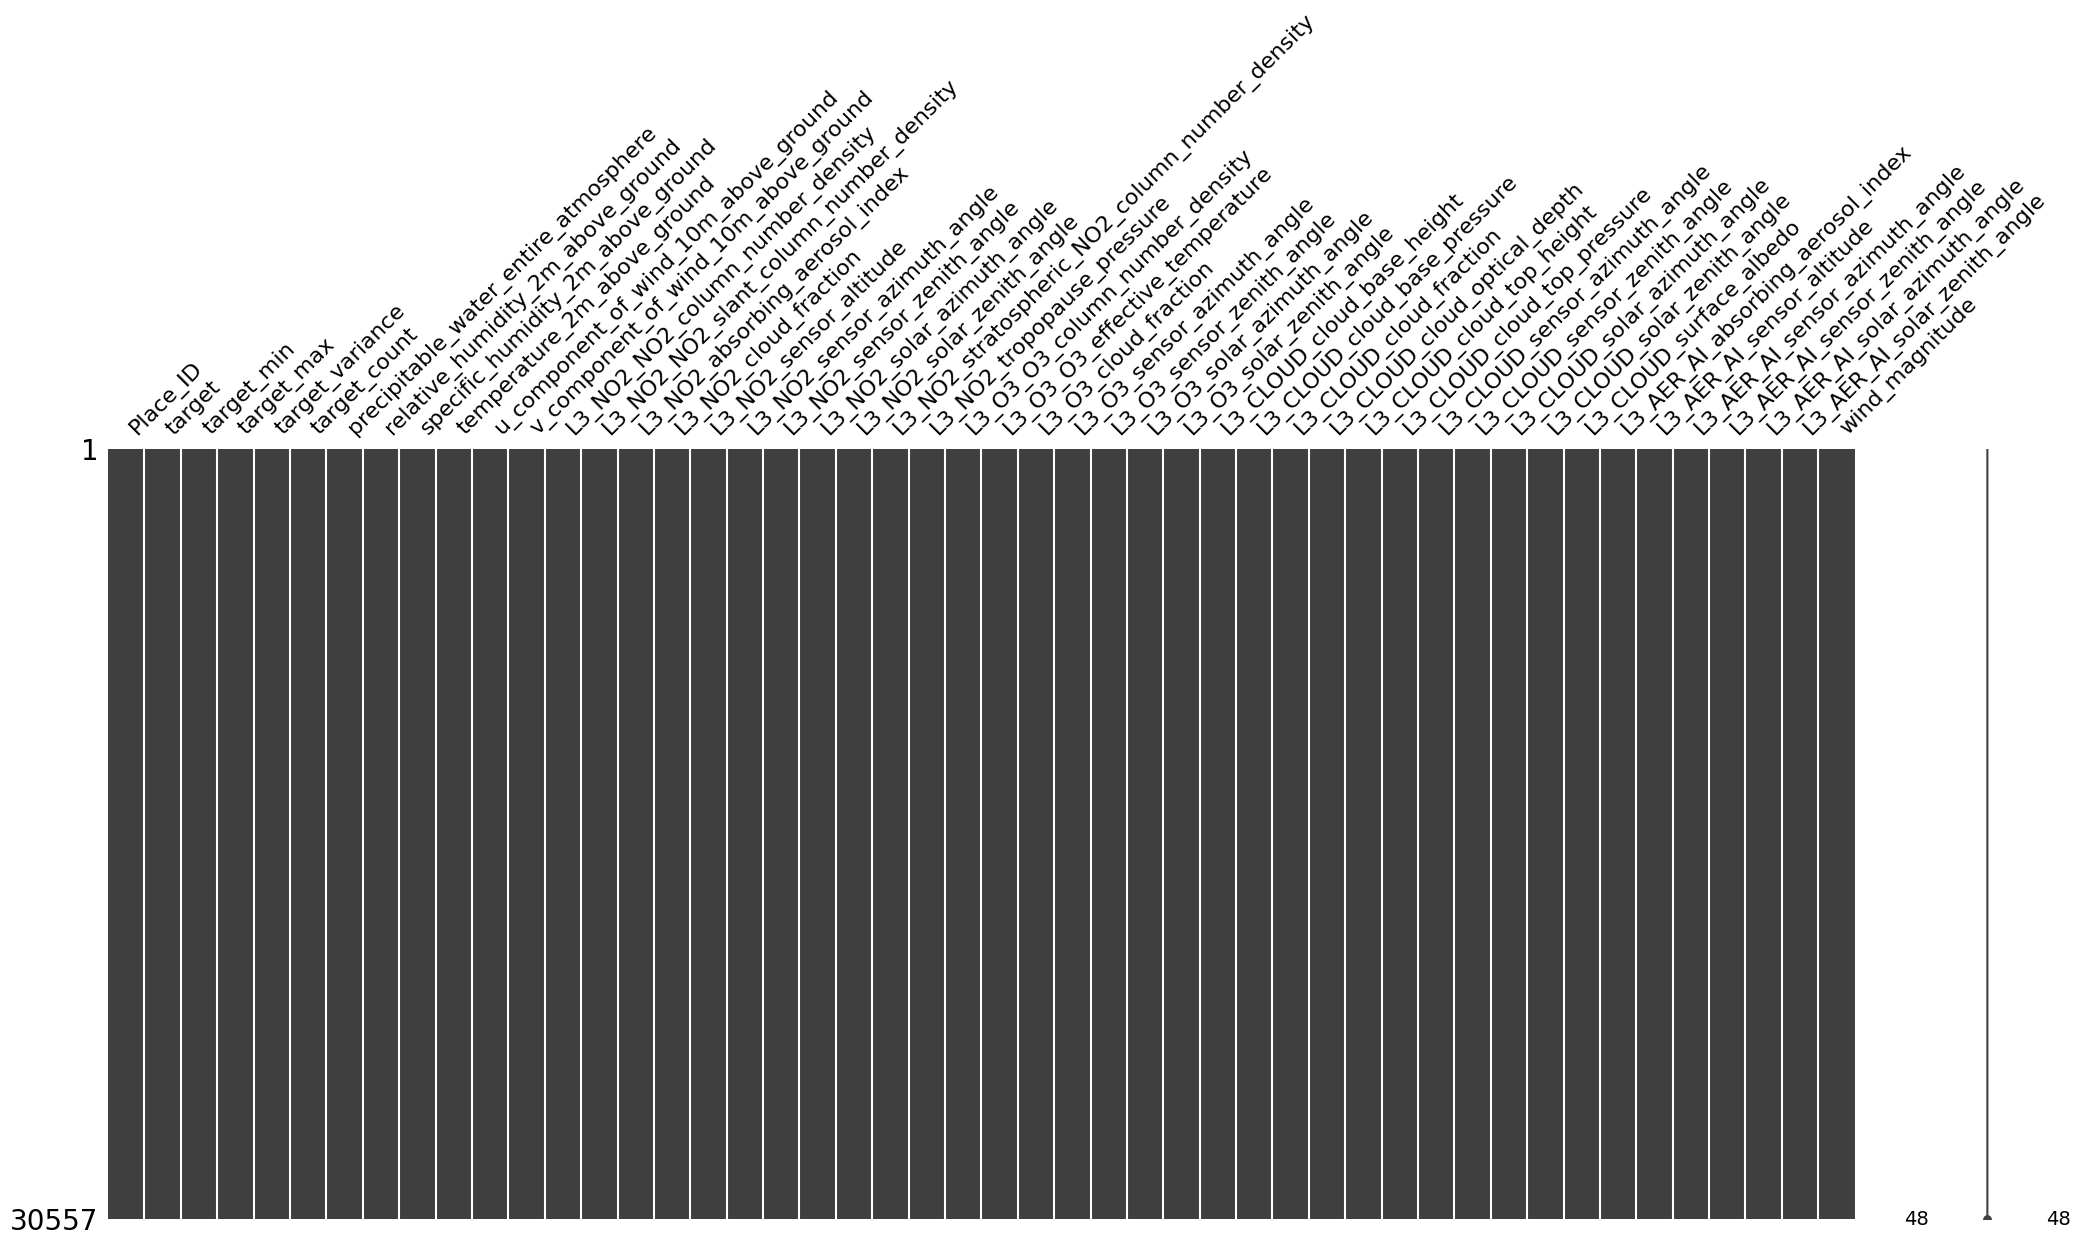

In [35]:
msno.matrix(train_place)

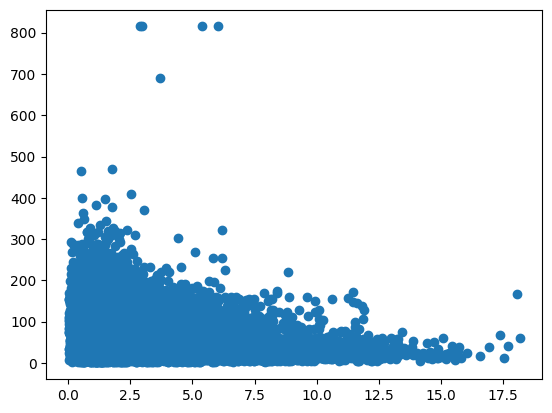

In [36]:
plt.scatter(train_place['wind_magnitude'], train_place['target'])

### First baseline model

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
X = train_place[['wind_magnitude']]
y = train_place['target']

In [39]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

In [40]:
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature wind:", slope)

Model intercept: 83.62764490767461
Coefficient for feature wind: -7.249773343626536


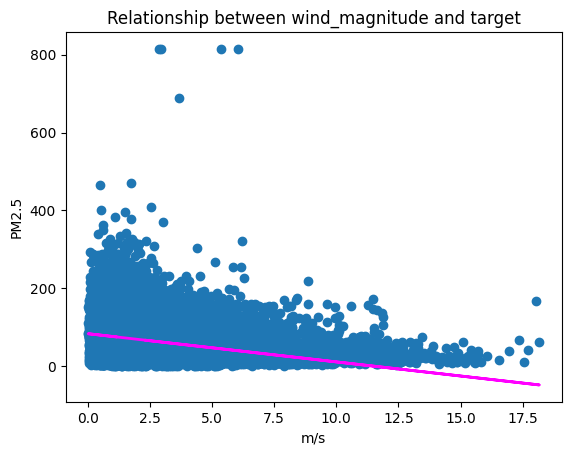

In [41]:
# Plotting our data points
plt.scatter(X, y)

# Adding the fitted regression line of our model
plt.plot(X, X*slope +intercept, '-', color='magenta', linewidth=2)

plt.title("Relationship between wind_magnitude and target")
plt.ylabel("PM2.5");
plt.xlabel("m/s");

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = lin_reg.predict(X)

print("RMSE:", mean_squared_error(y, y_pred, squared=False))
print("R-squared:", r2_score(y, y_pred).round(3))

RMSE: 44.03910614801851
R-squared: 0.117


In [43]:
new_wind = pd.DataFrame({'wind_magnitude': [5.5]})
y_hat = lin_reg.predict(new_wind)

In [44]:
print("Predicted value for new observation:", y_hat[0].round(3))

Predicted value for new observation: 43.754


In [62]:
def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

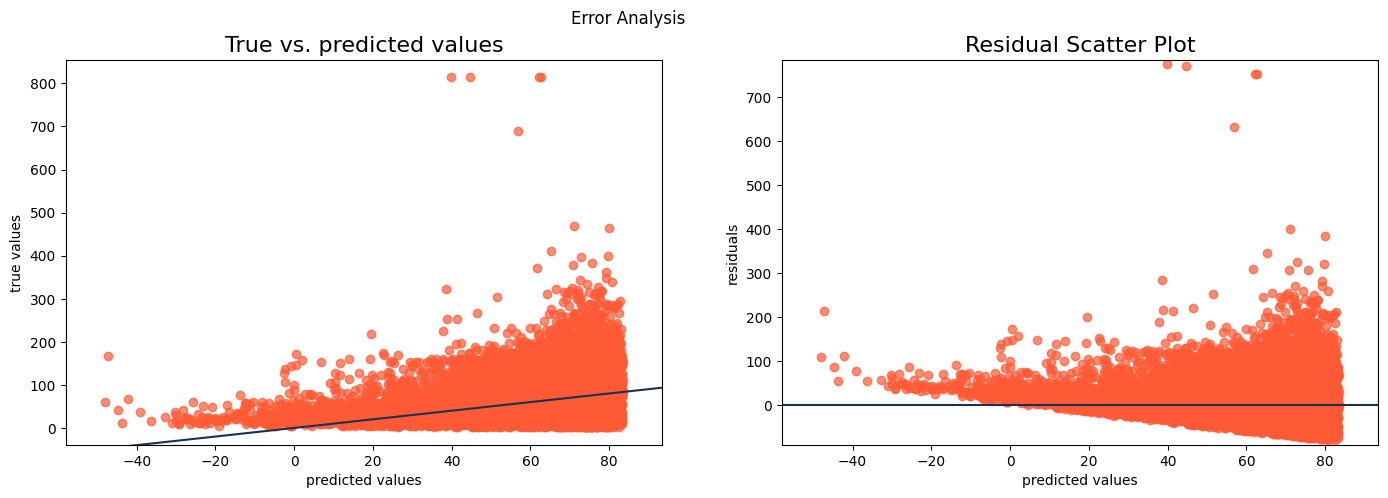

In [63]:
error_analysis(y, y_pred)

## Evaluating Model on Test Set

First we impute the test data as we did for the train data. Then we make predictions for the test data using our baseline model.

In [45]:
test = pd.read_csv("data/Test.csv")

In [46]:
print(test.shape)
test.columns

(16136, 77)


Index(['Place_ID X Date', 'Date', 'Place_ID',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_sola

<Axes: >

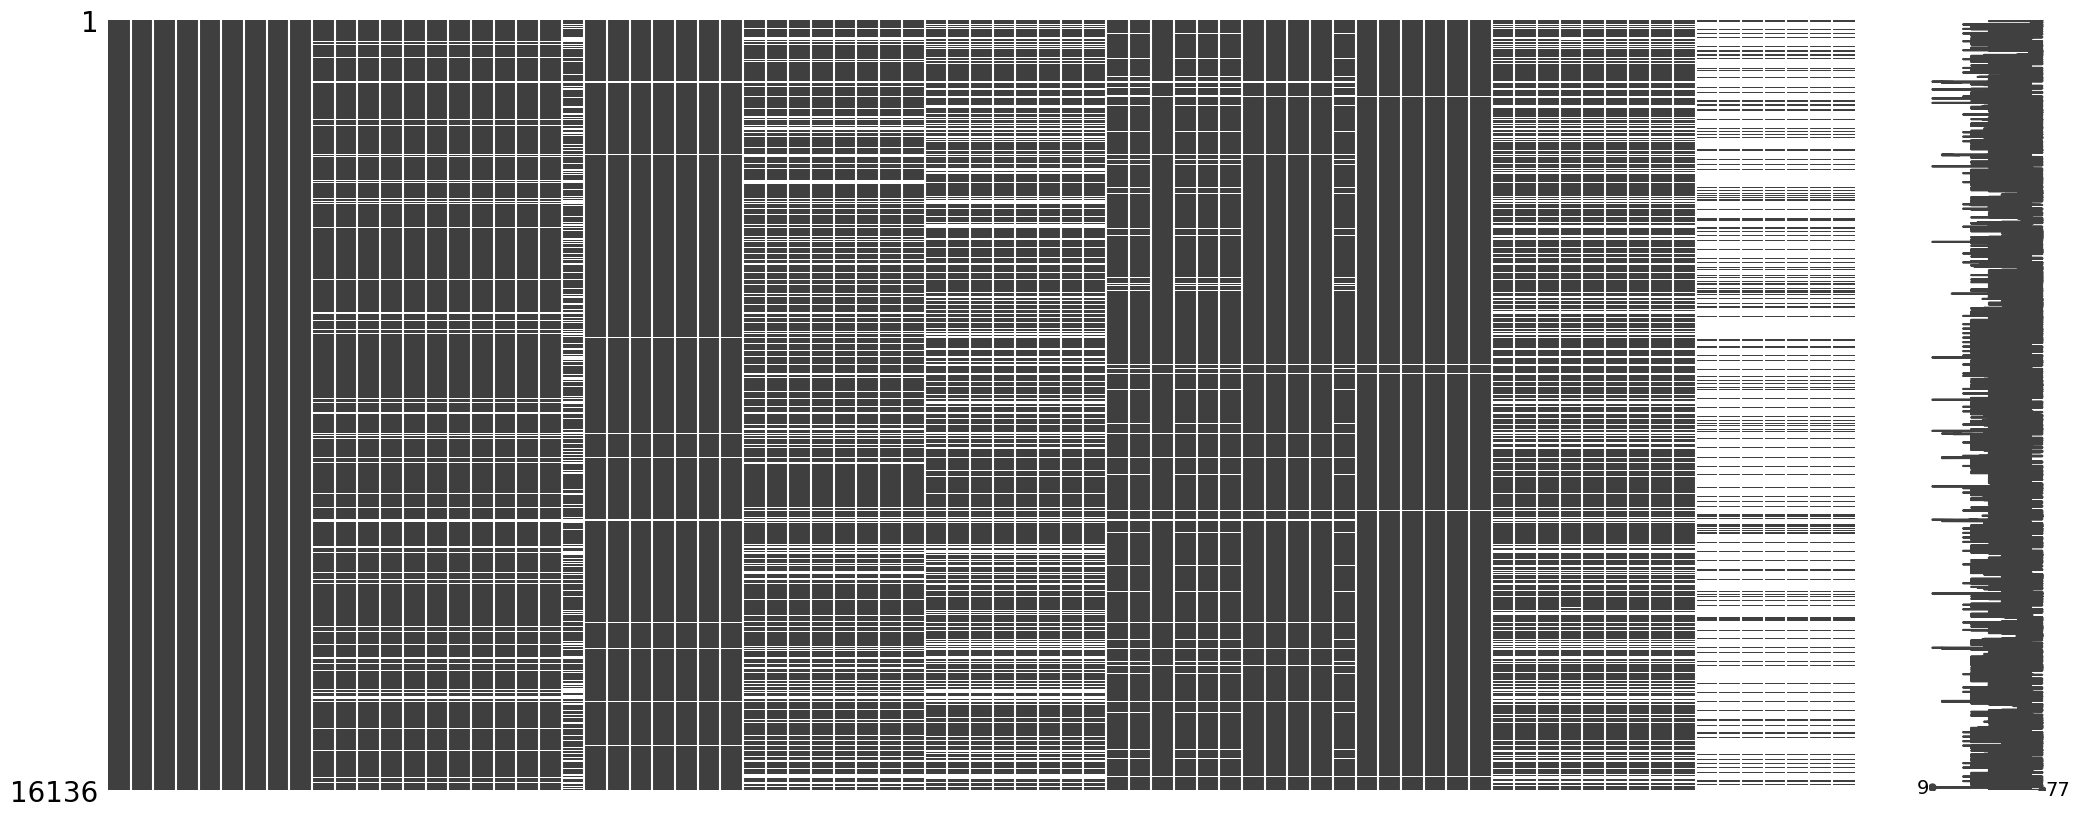

In [47]:
msno.matrix(test)

In [48]:
print(f"numbers of rows : {test.shape[0]}")
high_missing_cols_test= []
index_list_test = []
for index, col in enumerate(test.columns):
    mpercentage = round(test[col].isna().sum()/test.shape[0]*100,2)
    if mpercentage > 15:
        high_missing_cols_test.append(col)
        index_list_test.append(index)
        print(f"missing values in {index} - {col} : {mpercentage} %")

print(f"missing values in data frame : {round(test.isna().sum().sum()/(test.shape[0]*test.shape[1])*100,2)} %")
print(high_missing_cols_test)

numbers of rows : 16136
missing values in 20 - L3_NO2_tropospheric_NO2_column_number_density : 30.82 %
missing values in 28 - L3_CO_CO_column_number_density : 18.6 %
missing values in 29 - L3_CO_H2O_column_number_density : 18.6 %
missing values in 30 - L3_CO_cloud_height : 18.6 %
missing values in 31 - L3_CO_sensor_altitude : 18.6 %
missing values in 32 - L3_CO_sensor_azimuth_angle : 18.6 %
missing values in 33 - L3_CO_sensor_zenith_angle : 18.6 %
missing values in 34 - L3_CO_solar_azimuth_angle : 18.6 %
missing values in 35 - L3_CO_solar_zenith_angle : 18.6 %
missing values in 36 - L3_HCHO_HCHO_slant_column_number_density : 26.15 %
missing values in 37 - L3_HCHO_cloud_fraction : 26.15 %
missing values in 38 - L3_HCHO_sensor_azimuth_angle : 26.15 %
missing values in 39 - L3_HCHO_sensor_zenith_angle : 26.15 %
missing values in 40 - L3_HCHO_solar_azimuth_angle : 26.15 %
missing values in 41 - L3_HCHO_solar_zenith_angle : 26.15 %
missing values in 42 - L3_HCHO_tropospheric_HCHO_column_num

In [49]:
print(len(high_missing_cols_train))
print(len(high_missing_cols_test))

33
33


In [50]:
# Remove columns by index
test_bl = test.copy()
test_bl = test_bl.drop(test_bl.columns[index_list_test], axis=1)

In [51]:
test_bl = test_bl.drop(['Place_ID X Date', 'Date'], axis=1)
means = test_bl.groupby('Place_ID').mean()

grouped = test_bl.groupby('Place_ID')

for name, group in grouped:
    mask = test_bl['Place_ID'] == name
    test_bl.loc[mask] = test_bl.loc[mask].fillna(means.loc[name])

<Axes: >

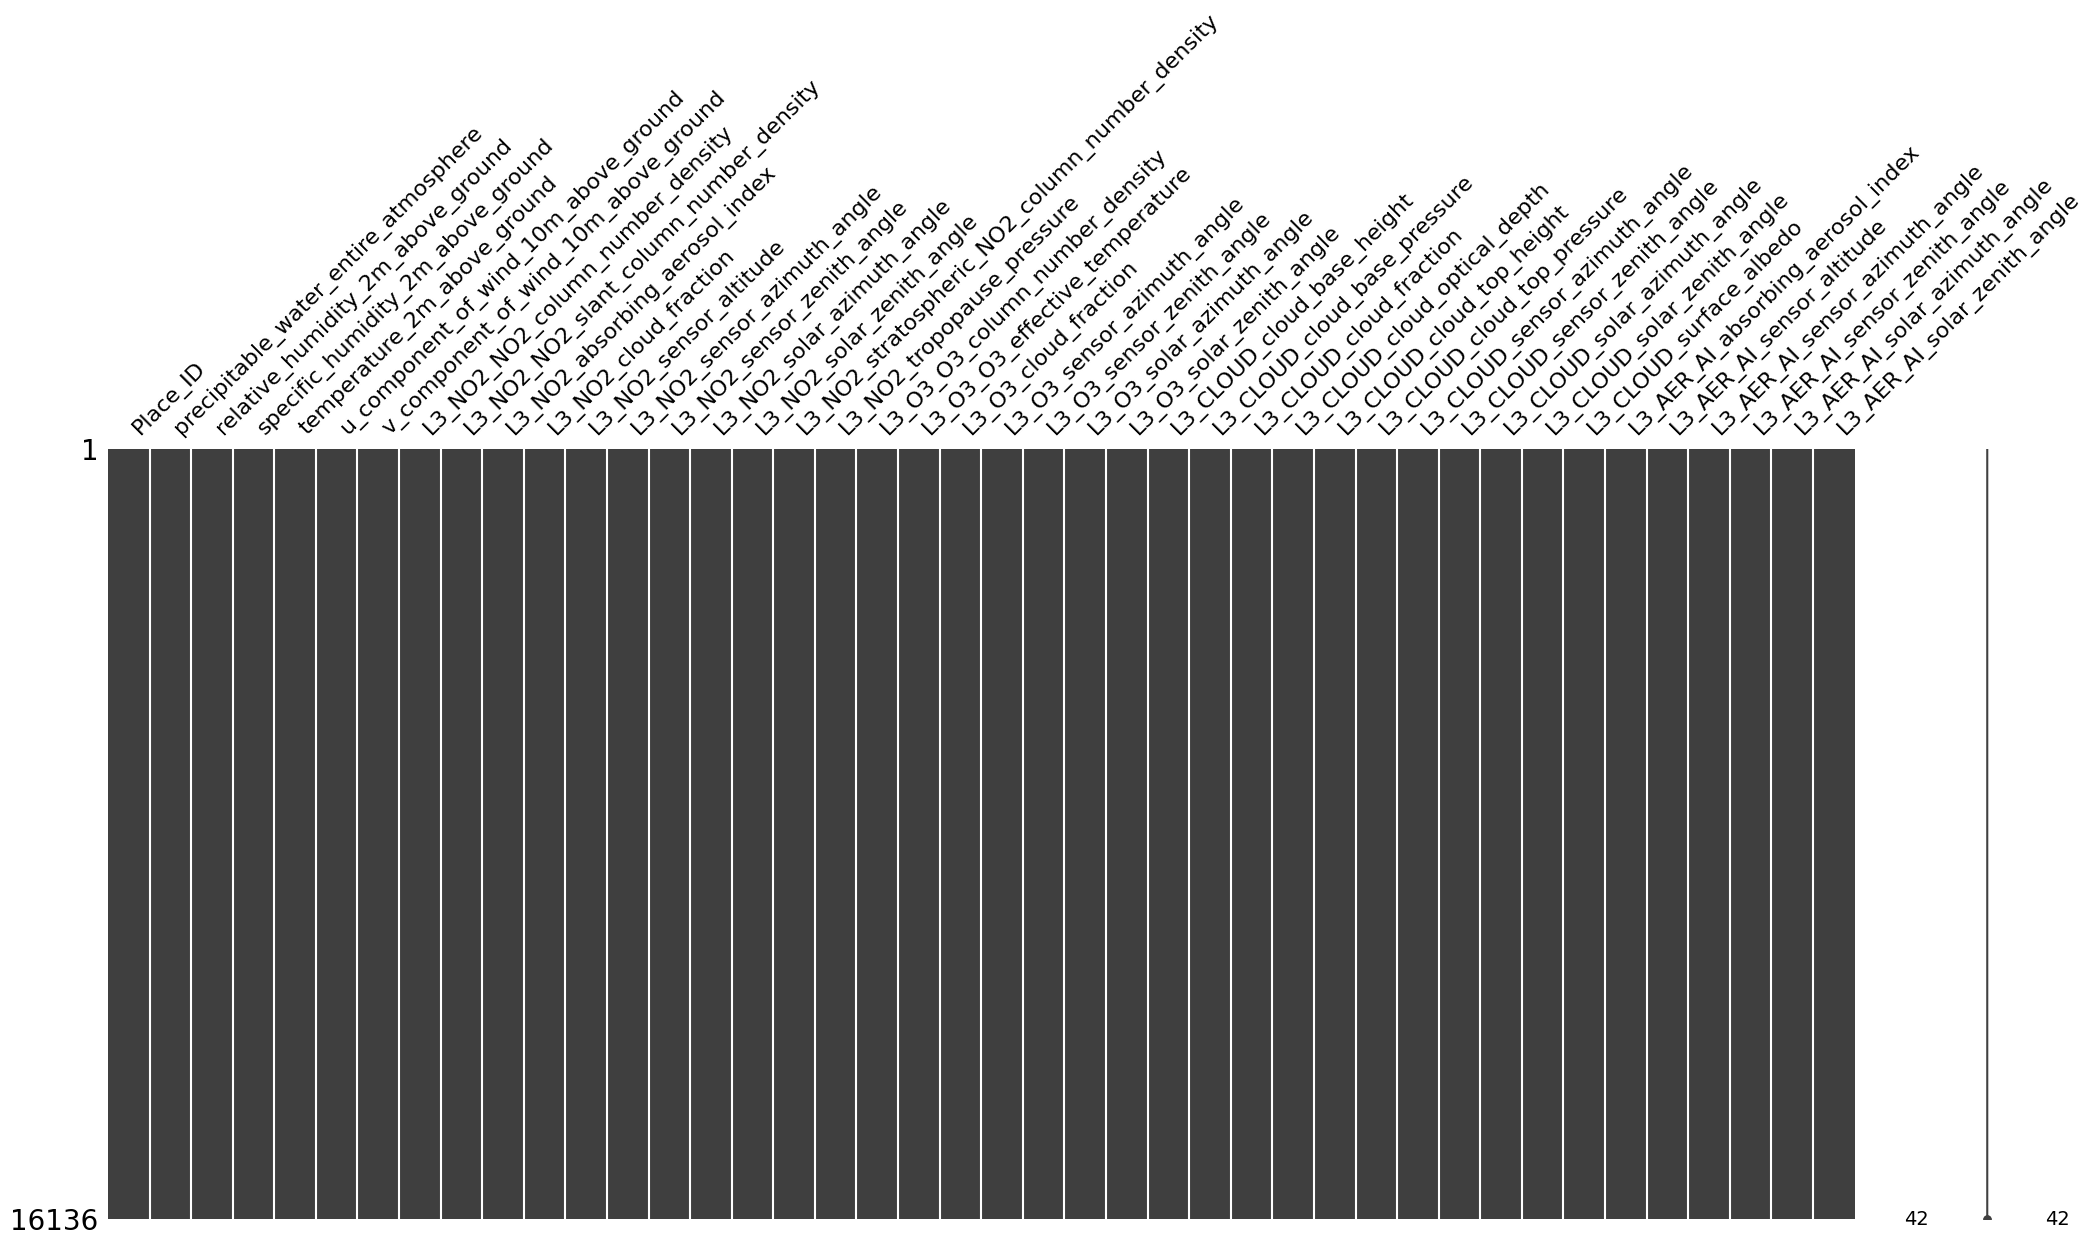

In [52]:
msno.matrix(test_bl)

In [53]:
test_bl['wind_magnitude'] = np.sqrt(test_bl['u_component_of_wind_10m_above_ground']**2 + test_bl['v_component_of_wind_10m_above_ground']**2)

In [56]:
X_test = test_bl[['wind_magnitude']]
y_pred_test = lin_reg.predict(X_test)
y_pred_test.shape

(16136,)

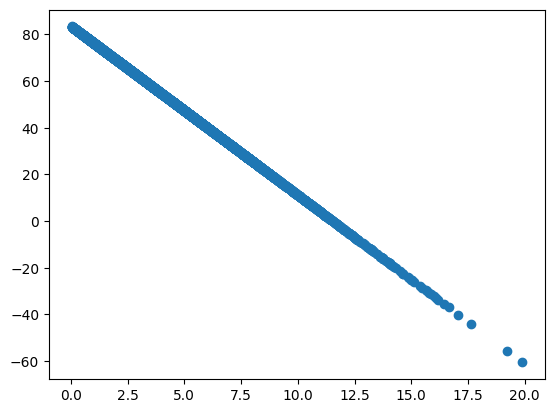

In [58]:
plt.scatter(X_test, y_pred_test)

## Ensemble Method Modeling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

RSEED=42

In [64]:
y = train['target']
X = train.drop(['target', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1)